# K-Means

In [271]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib as plt

In [149]:
df = pd.read_table("data/unbalance.txt", delim_whitespace=True, names=('x', 'y'))

In [150]:
df.head()

,x,y
0,151700,351102
1,155799,354358
2,142857,352716
3,152726,349144
4,151008,349692


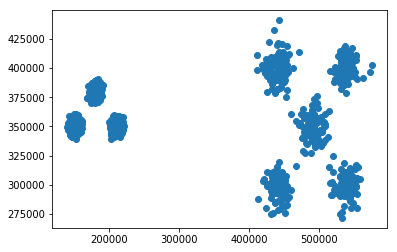

In [151]:
pl.scatter(df['x'], df['y'])

Let's splice some colour!

In [152]:
colors = np.random.randint(low=0, high=2, size=len(df))

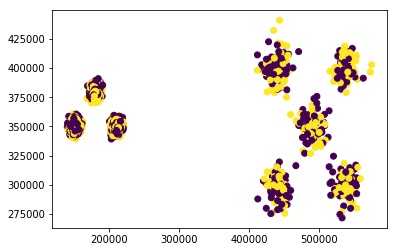

In [153]:
pl.scatter(df['x'], df['y'], c=colors)

Pretty!

## Algorithm

- Assign all points with random labels
- Choose N points at random and set them as centroids

    - Repeat while clusters change
    - Classify each point to as the centroid that's closest to it
        - Calculate distance to each centroid
        - Choose the cluster with the smallest distance as the new label
    - Assign new centroids as the centers of all the clusters
        - sum(x)/len(x), sum(y)/len(y)

In [154]:
#Number of clusters
k = 8

Better to work with the same random numbers.

In [168]:
np.random.seed(42)

Assign random labels for each point>

In [163]:
labels = np.random.randint(low=0, high=k, size=len(df))
labels

array([6, 3, 4, ..., 0, 1, 4])

Choose k random poits as centroids.

In [164]:
centroidIndexes = np.random.randint(len(df), size=k)
centroidIndexes

array([4015,  238,  204, 2607, 5552, 4340, 4927, 3388])

Get the random points coordinates as the centroids.

In [165]:
centroids = []

for i in range(k):
    centroids.append({'x': df.iloc[centroidIndexes[i]]['x'], 'y': df.iloc[centroidIndexes[i]]['y']})

centroids

[{'x': 212128, 'y': 350775},
 {'x': 148555, 'y': 347964},
 {'x': 150427, 'y': 348606},
 {'x': 181333, 'y': 382593},
 {'x': 204282, 'y': 348211},
 {'x': 208812, 'y': 350206},
 {'x': 211753, 'y': 347188},
 {'x': 180561, 'y': 378436}]

### Classify each point as the centroid closest to it.

Euclidian distance between two points.

In [189]:
np.linalg.norm([df.iloc[0]['x'], df.iloc[0]['y']] - [centroids[0]['x'], centroids[0]['y']])

TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [181]:
[df.iloc[0]['x'], df.iloc[0]['y']] 

[151700, 351102]

In [183]:
[centroids[0]['x'], centroids[0]['y']]

[212128, 350775]

In [201]:
from scipy.spatial import distance as scipyDistance
distance = scipyDistance.euclidean([df.iloc[0]['x'], df.iloc[0]['y']], [centroids[0]['x'], centroids[0]['y']])
distance

60428.884757208616

In [219]:
for pointIndex in range(len(df)):
    point = df.iloc[pointIndex]

    distances = {}
    for cluster in range(k):
        distance = scipyDistance.euclidean([point['x'], point['y']], [centroids[cluster]['x'], centroids[cluster]['y']])
        distances[cluster] = distance

    closestCluster = min(distances, key=distances.get)
    labels[pointIndex] = closestCluster

Let's see the pretty picture after one iteration.

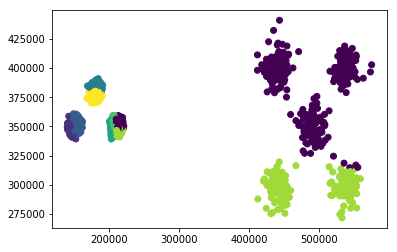

In [220]:
pl.scatter(df['x'], df['y'], c=labels)

In [239]:
centroidsXs = []
centroidsYs = []
for i in range(k):
    centroidsXs.append(centroids[i]['x'])
    centroidsYs.append(centroids[i]['y'])

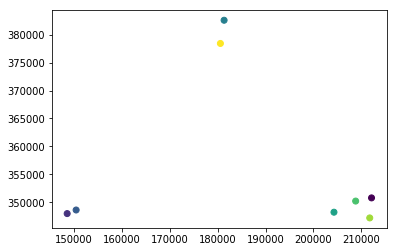

In [240]:
pl.scatter(centroidsXs, centroidsYs, c=[0,1,2,3,4,5,6,7])

Really wanna scale the two plots... Just a small hack will do it.

In [241]:
centroidsXs.append(min(df['x']))
centroidsXs.append(max(df['x']))
centroidsYs.append(min(df['y']))
centroidsYs.append(max(df['y']))

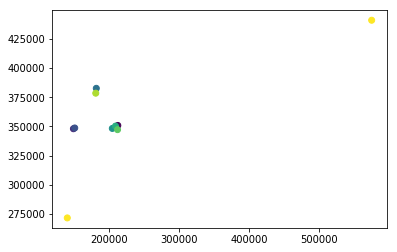

In [242]:
pl.scatter(centroidsXs, centroidsYs, c=[0,1,2,3,4,5,6,7,8,8])

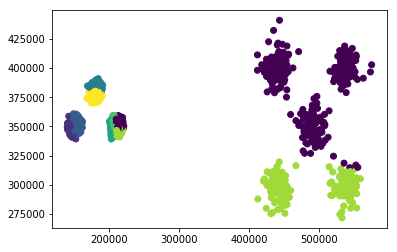

In [245]:
pl.scatter(df['x'], df['y'], c=labels)

All the centroids are in the 3 clusters to the left.

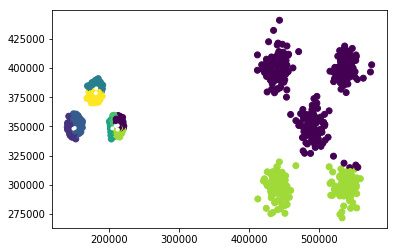

In [267]:
pl.scatter(df['x'], df['y'], c=labels)

centroidsXs = []
centroidsYs = []
for i in range(k):
    centroidsXs.append(centroids[i]['x'])
    centroidsYs.append(centroids[i]['y'])
    
pl.scatter(centroidsXs, centroidsYs, marker='o', s=8, c=['white','white','white','white','white','white','white','white'])


If you squint your eyes just right, you may be able to see the little white dots representing the centroids.